Instruction Link:
https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/

In [144]:
# ! pip install gunicorn
# !pip install dash-tools
# !pip install yfinance 
# ! pip install plotly
# ! pip install pandas-ta
# ! pip install pandas-datareader
# pip install dnspython

  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=68ec2745b6e7f78c0ea6867a2ea6bdb3d477431179d67635eb1dcb54d41f0e54
  Stored in directory: c:\users\hhuang4\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas-ta


Error processing line 1 of C:\Users\hhuang4\Anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "C:\Users\hhuang4\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date
import matplotlib.pyplot as plt
from pandas_datareader import data
import time
import os

In [2]:
tickers = ['SPY', 'AMZN', 'AAPL', 'GOOG', 'MSFT','GS', 'JPM', 'MS']
start_date = '2017-01-01'
end_date = date.today()
# data.DataReader using 'google' was discontinued. Use 'yahoo'
# panel_data = data.DataReader('INPX', tickers, start_date, end_date)

data = yf.download(tickers, start_date, end_date)
data_df = pd.DataFrame(data)
data_df


[*********************100%***********************]  8 of 8 completed


Adj Close                                                  \
                  AAPL        AMZN        GOOG          GS         JPM   
Date                                                                     
2017-01-03   27.219831   37.683498   39.306999  218.627548   74.436729   
2017-01-04   27.189365   37.859001   39.345001  220.039383   74.574020   
2017-01-05   27.327635   39.022499   39.701000  218.401306   73.887596   
2017-01-06   27.632290   39.799500   40.307499  221.641296   73.896149   
2017-01-09   27.885386   39.846001   40.332500  219.822205   73.947647   
...                ...         ...         ...         ...         ...   
2022-08-17  174.550003  142.100006  120.320000  353.739990  122.589996   
2022-08-18  174.149994  142.300003  120.860001  354.519989  121.639999   
2022-08-19  171.520004  138.229996  118.120003  349.269989  118.629997   
2022-08-22  167.570007  133.220001  115.070000  342.420013  116.669998   
2022-08-23  167.229996  133.619995  114.769997  340.179993  115.519997   

                                                    Close              ...  \
                   MS        MSFT         SPY        AAPL        AMZN  ...   
Date                                                                   ...   
2017-01-03  37.129055   57.807827  204.625183   29.037500   37.683498  ...   
2017-01-04  37.620659   57.549179  205.842545   29.004999   37.859001  ...   
2017-01-05  37.275665   57.549179  205.679031   29.152500   39.022499  ...   
2017-01-06  37.819012   58.048000  206.414871   29.477501   39.799500  ...   
2017-01-09  36.835800   57.863247  205.733505   29.747499   39.846001  ...   
...               ...         ...         ...         ...         ...  ...   
2022-08-17  91.349998  291.320007  426.649994  174.550003  142.100006  ...   
2022-08-18  91.730003  290.170013  427.890015  174.149994  142.300003  ...   
2022-08-19  90.010002  286.149994  422.140015  171.520004  138.229996  ...   
2022-08-22  88.459999  277.750000  413.350006  167.570007  133.220001  ...   
2022-08-23  88.300003  276.440002  412.350006  167.229996  133.619995  ...   

                  Open                 Volume                                \
                  MSFT         SPY       AAPL       AMZN      GOOG       GS   
Date                                                                          
2017-01-03   62.790001  225.039993  115127600   70422000  33146000  4384200   
2017-01-04   62.480000  225.619995   84472400   50210000  21460000  2728700   
2017-01-05   62.189999  226.270004   88774400  116602000  26704000  3562600   
2017-01-06   62.299999  226.529999  127007600  119724000  32804000  3591100   
2017-01-09   62.759998  226.910004  134247600   68922000  25492000  3022800   
...                ...         ...        ...        ...       ...      ...   
2022-08-17  289.739990  425.910004   79542000   48149800  17589200  1576300   
2022-08-18  290.190002  426.859985   62290100   37458700  15652000  1102200   
2022-08-19  288.899994  424.980011   70211500   47727300  20171100  1811900   
2022-08-22  282.079987  417.049988   69026800   50461500  19316000  1723900   
2022-08-23  276.440002  412.899994   54147100   36252100  14390700  1538000   

                                                    
                 JPM        MS      MSFT       SPY  
Date                                                
2017-01-03  20550700   8316900  20694100  91366500  
2017-01-04  15266600   7747400  21340000  78744400  
2017-01-05  14300800   9883200  24876000  78379000  
2017-01-06  12893300   9152800  19922900  71559900  
2017-01-09  12806600  11104000  20382700  46939700  
...              ...       ...       ...       ...  
2022-08-17   8149300   5499000  18253400  63563400  
2022-08-18   9531800   4664800  17186200  49023200  
2022-08-19  13462500   6263500  20557200  67934700  
2022-08-22   8967600   6452800  25061100  77695600  
2022-08-23   7607000   7487700  17527400  49105200  

[1420 rows x 48 columns]

In [3]:
close_df = yf.download(tickers, start_date, end_date)['Adj Close'].reset_index()
close_df.rename(columns={'': 'Date'}, inplace=True)
close_df.to_csv('close_price.csv', index = False)
close_df.head()


[*********************100%***********************]  8 of 8 completed


,Date,AAPL,AMZN,GOOG,GS,JPM,MS,MSFT,SPY
0,2017-01-03,27.219830,37.683498,39.306999,218.627548,74.436737,37.129055,57.807831,204.625183
1,2017-01-04,27.189367,37.859001,39.345001,220.039383,74.574028,37.620663,57.549183,205.842514
2,2017-01-05,27.327631,39.022499,39.701000,218.401306,73.887589,37.275661,57.549183,205.679031
3,2017-01-06,27.632292,39.799500,40.307499,221.641281,73.896141,37.819027,58.048004,206.414841
4,2017-01-09,27.885387,39.846001,40.332500,219.822174,73.947632,36.835819,57.863255,205.733536


In [17]:
df = close_df.loc[:,['Date','AAPL']]

In [18]:
df

,Date,AAPL
0,2017-01-03,27.219830
1,2017-01-04,27.189367
2,2017-01-05,27.327631
3,2017-01-06,27.632292
4,2017-01-09,27.885387
...,...,...
1415,2022-08-17,174.550003
1416,2022-08-18,174.149994
1417,2022-08-19,171.520004
1418,2022-08-22,167.570007


In [19]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace= True)
df = df[['AAPL']]

In [20]:
df

,AAPL
Date,
2017-01-03,27.219830
2017-01-04,27.189367
2017-01-05,27.327631
2017-01-06,27.632292
2017-01-09,27.885387
...,...
2022-08-17,174.550003
2022-08-18,174.149994
2022-08-19,171.520004


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1420 entries, 2017-01-03 to 2022-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1420 non-null   float64
dtypes: float64(1)
memory usage: 22.2 KB
None


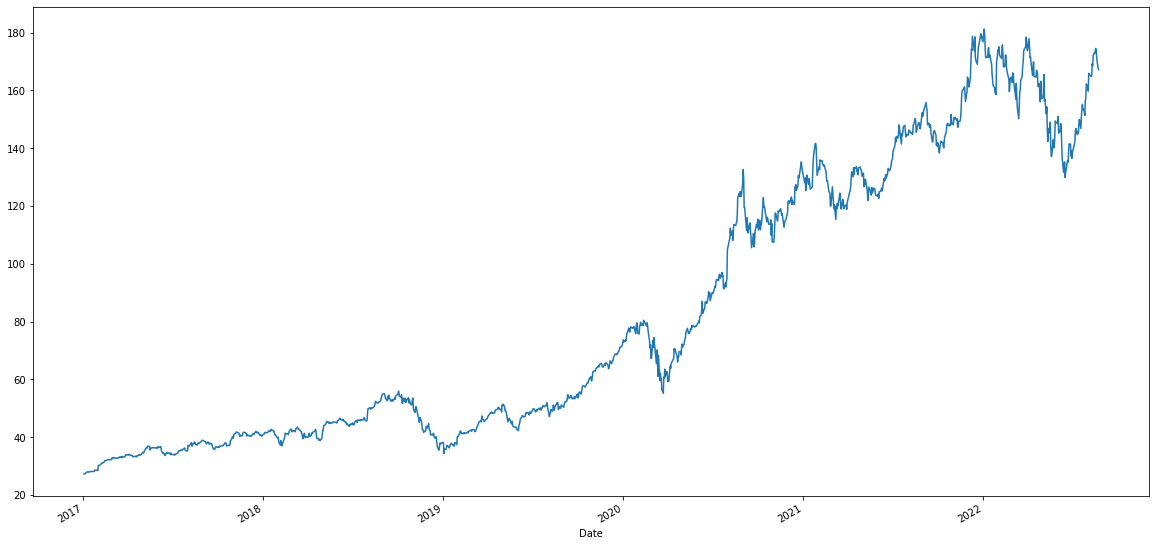

In [22]:
# zhe bu fen ke yi bu yong
import matplotlib.pyplot as plt
adj_close = df['AAPL']
adj_close.plot(figsize = (20,10))
plt.show() 

In [23]:
print(df.head(10))

                 AAPL
Date                 
2017-01-03  27.219830
2017-01-04  27.189367
2017-01-05  27.327631
2017-01-06  27.632292
2017-01-09  27.885387
2017-01-10  27.913515
2017-01-11  28.063496
2017-01-12  27.946320
2017-01-13  27.897108
2017-01-17  28.122086


In [24]:
import pandas_ta

In [25]:
df.ta.ema(close='AAPL', length=10, append=True)

Date
2017-01-03           NaN
2017-01-04           NaN
2017-01-05           NaN
2017-01-06           NaN
2017-01-09           NaN
                 ...    
2022-08-17    169.299700
2022-08-18    170.181571
2022-08-19    170.424923
2022-08-22    169.905847
2022-08-23    169.419329
Name: EMA_10, Length: 1420, dtype: float64

In [26]:
print(df.head(10))

                 AAPL     EMA_10
Date                            
2017-01-03  27.219830        NaN
2017-01-04  27.189367        NaN
2017-01-05  27.327631        NaN
2017-01-06  27.632292        NaN
2017-01-09  27.885387        NaN
2017-01-10  27.913515        NaN
2017-01-11  28.063496        NaN
2017-01-12  27.946320        NaN
2017-01-13  27.897108        NaN
2017-01-17  28.122086  27.719703


In [27]:
df = df.iloc[10:]

In [28]:
print(df.head(10))

                 AAPL     EMA_10
Date                            
2017-01-18  28.119743  27.792438
2017-01-19  28.070522  27.842999
2017-01-20  28.122086  27.893742
2017-01-23  28.140831  27.938667
2017-01-24  28.115051  27.970737
2017-01-25  28.562660  28.078359
2017-01-26  28.576719  28.168970
2017-01-27  28.579065  28.243533
2017-01-30  28.504070  28.290903
2017-01-31  28.438457  28.317731


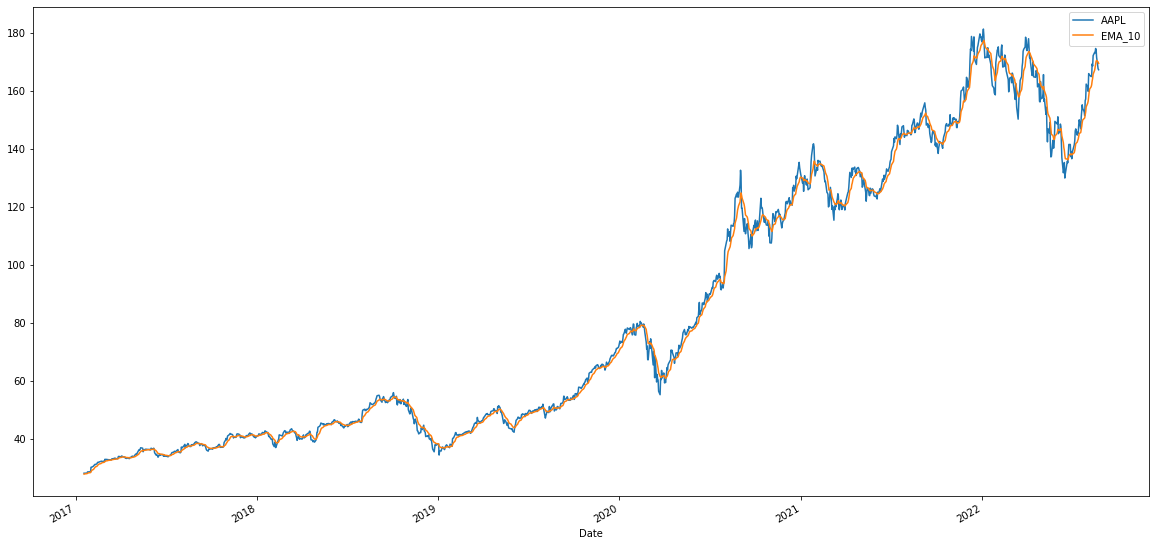

In [29]:
import matplotlib.pyplot as plt
adj_close = df
adj_close.plot(figsize = (20,10))
plt.show() 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[['AAPL']], df[['EMA_10']], test_size=0.3,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
reg = model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [35]:
reg.score(X_test,y_test)

0.9969594175955414

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99492778]]
Mean Absolute Error: 1.6584089485163656
Coefficient of Determination: 0.9969594175955414
